# Consumer Electronics Sales Forecasting
## **Focus:** Sales forecasting for Fast Moving Consumer Electronics to Optimize Inventory Management and Maximize Profitability.

### Import Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [10]:
data = pd.read_csv(r'C:\Users\hp\Downloads\redertelecomchurn\ElectroForecasting\ElectroTech Forecasting Data.csv')

In [11]:
data

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81
...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287


In [12]:
data['Category'].unique()

array(['Laptop', 'Tablet', 'Smartphone', 'Accessories'], dtype=object)

A quick overview of what each column represents to note from this:
- `Product_ID`: This is the ID that distinguishes the products from each other. It contains integer values.
- `Category`: This is the product category, from what can be seen here, there are Laptop, Tablet and Smartphone categories among other.
- `Price`: This is the price of the product in US dollars.
- `Date`: The date of the sale of that product.
- `Season`: The season of the year that product was sold.
- `Market_Trend_Index`: Represents external factors affecting the electronic industry.
- `Competitor_Activity_Score`: Measure the influence of the company's competitors in the market.
- `Consumer_Confidence_Index`: Measures consumer confidence at that particular date.
- Product Specifications: Specific information on the the products themselves.

### Data Preparation

- Check for missing values
- Check for duplicate
- Deal with datatypes
- Check data distribution to account for outliers and deal with these outliers

In [13]:
print(f"{data.isnull().sum()}\n")
print(f"{data.duplicated().sum()}\n")
print(f"{data.dtypes}\n")

Product_ID                   0
Category                     0
Price                        0
Date                         0
Season                       0
Market_Trend_Index           0
Competitor_Activity_Score    0
Consumer_Confidence_Index    0
Product_Specification_1      0
Product_Specification_2      0
Sales_Volume                 0
dtype: int64

0

Product_ID                     int64
Category                      object
Price                        float64
Date                          object
Season                        object
Market_Trend_Index           float64
Competitor_Activity_Score    float64
Consumer_Confidence_Index    float64
Product_Specification_1       object
Product_Specification_2       object
Sales_Volume                   int64
dtype: object



In [14]:
data['Date'] = data['Date'].astype("datetime64[ns]")
data['Date'].dtype

dtype('<M8[ns]')

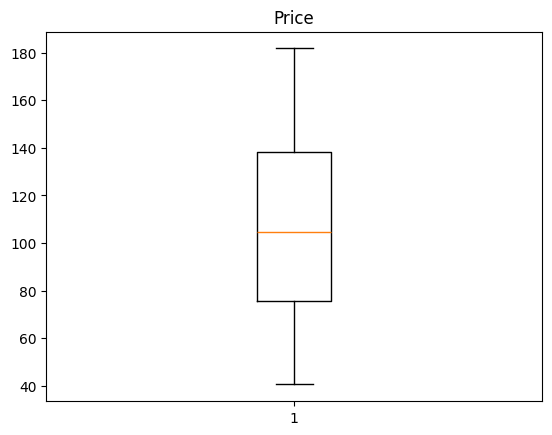

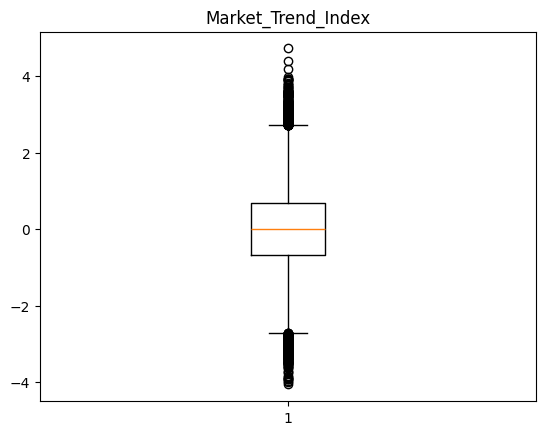

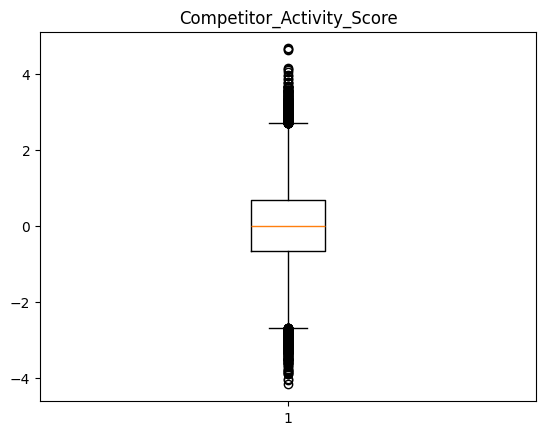

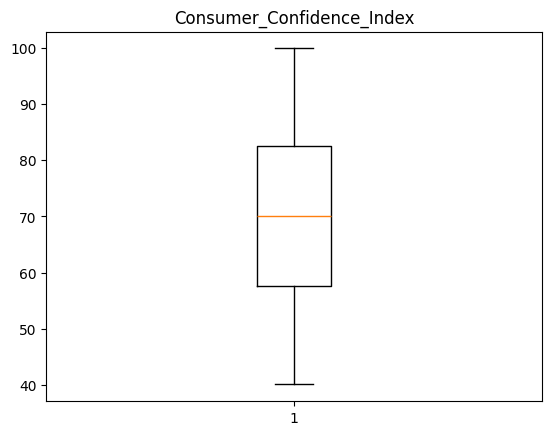

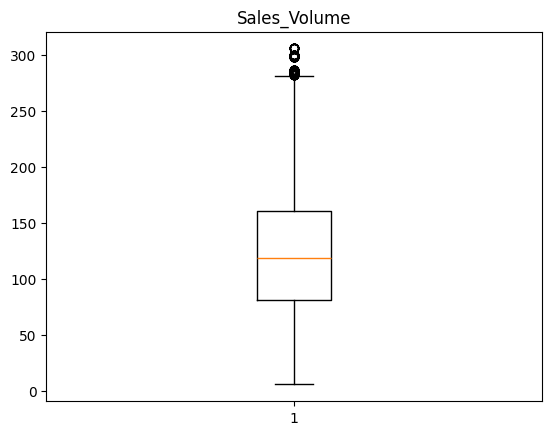

In [15]:
outlier_columns = data.select_dtypes(exclude=['object', 'datetime64[ns]']).iloc[0:, 1:].columns.to_list()

for column in outlier_columns:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

### Save Preprocessed Data for Proper Exploratory Data Analysis

In [16]:
data.to_csv(r"cleaned_data.csv", index=False)